# Data Cleaning & Description

Morgan Nielsen & Sarah Winters

In [11]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA

In our project, we aim to analyze data pertaining to railroad dispatchers, individuals with non-traditional work and sleep patterns. The dataset meticulously records the sleep and work schedules of numerous employees spanning slightly over a month. Prior to delving into data exploration and cleansing processes, our primary objective is to use the  information as efficiently as possible to predict future trends among employees.


To assess the accuracy of our predictions, we have identified another dataset featuring information about railroad signalmen. This supplementary dataset, which shares similarities with our primary dataset, serves as a valuable benchmark for comparison. Our approach involves predicting the potential impact on future months based on the collective data, thus steering clear of using the current dataset for the validation of our predictions. Instead, the distinct dataset acts as an external point of reference to validate the credibility of our predictive outcomes.


In [2]:
# used pip install to install this package needed for importing a excel spreadsheet
!pip install xlrd


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python3.10 -m pip install --upgrade pip


In [3]:
# read in the xls (Excel File) into a pandas dataframe 
dispatcher_data = pd.read_excel("Dispatchers_Daily_Log.xls")

# print out basic information about the dataframe 
# print(dispatcher_data.info())

In [4]:
# display a few dozen rows of the data
print(dispatcher_data.head(48))

    ID       Date  Type_of_day  Sleep_location            Bed_time  \
0    2 2006-04-26            1             1.0 2006-04-26 01:30:00   
1    2 2006-04-27            1             1.0 2006-04-27 01:30:00   
2    2 2006-04-28            1             1.0 2006-04-28 01:00:00   
3    2 2006-04-29            1             1.0 2006-04-29 03:00:00   
4    2 2006-04-30            1             1.0 2006-04-30 02:15:00   
5    2 2006-05-01            2             1.0 2006-05-01 03:30:00   
6    2 2006-05-02            2             1.0 2006-05-02 01:30:00   
7    2 2006-05-03            1             1.0 2006-05-03 02:15:00   
8    2 2006-05-04            1             1.0 2006-05-04 01:00:00   
9    2 2006-05-05            1             1.0 2006-05-05 02:00:00   
10   2 2006-05-06            1             1.0 2006-05-06 03:00:00   
11   2 2006-05-07            1             1.0 2006-05-07 02:30:00   
12   2 2006-05-08            2             1.0 2006-05-08 01:00:00   
13   2 2006-05-09   

Upon printing out a substantial portion of the dataset, it becomes evident that the volume of information is considerable, suggesting potential opportunities for our analysis. From our previous knowledge of this dataset, this was not unexpected. However, an essential step in enhancing the dataset's utility involves the removal of unnecessary columns that do not contribute significantly to our study or project. By paring down the dataset to retain only essential features, we aim to refine the focus of our analysis and optimize computational efficiency.


In terms of feature engineering, there is a recognition that certain variables might benefit from transformation or combination to extract more meaningful insights. For instance, creating composite features representing cumulative work hours or designing a metric for sleep efficiency could contribute to a more nuanced understanding of railroad dispatchers' schedules. We will consider and try many different engineering techniques  in our future analysis.

In [ ]:
# check for missing data 
missing_data = dispatcher_data.isnull().sum()
print("Missing Data:")
print(missing_data)

In [ ]:
# OPTIONAL: Visualize missing data pattern
plt.figure(figsize=(12, 6))
sns.heatmap(dispatcher_data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Pattern")
plt.show()

As we can see, the dataset has a noticeable amount of missing data; however, the proportion is relatively small when considered against the overall size of the dataset. A significant portion of the missing data pertains to columns, such as those recording nap-related information, that are not essential for our analysis. Consequently, we will drop these columns, streamlining the dataset for more focused examination. Some missing data also stems from the nature of the recorded activities. For instance, not every individual takes a nap every day, and there may be instances where not everyone is engaged in work on a daily basis throughout the 14-day period. This understanding of the data's context informs our approach to handling missing values, ensuring that the data cleaning process aligns with the practical aspects of the recorded activities.


We will drop all the columns related to napping data, and then together we decided we will keep the missing work values to try to analyze whether their sleep during “weekends” drastically changes or is still affected by their abnormal work schedules. As we continue with our analysis, we may contninue to drop columns, but as of now, we feel good about our dataset.

In [4]:
# drop the columns about naps
no_nap_dispatcher = dispatcher_data.drop(['Nap1_time_fell_asleep', 'Nap1_time_awoke', 'Nap2_time_fell_asleep', 'Nap2_time_awoke', 'Nap3_time_fell_asleep', 'Nap3_time_awoke'], axis=1)
# sns.heatmap(no_nap_dispatcher.isnull(), cbar=False, cmap='viridis')
# plt.title("Missing Data Pattern")
# plt.show()

There are still missing values in the columns related to sleep, but since it is only around 10% of the data, we plan to average out the values based on each employee. The code below allows us to see how many Nan values there are corresponding to each test subject, corresponding to the different ID numbers. We will use this information in our future analysis to help us decide how to average the missing values per employee.

In [5]:
grouped = no_nap_dispatcher.groupby('ID')

# Calculate the number of NaN values for each group
nan_counts = grouped.apply(lambda x: x.isnull().sum())

# print(nan_counts)

In [ ]:
# now we revisit how many nan values there are in each column total
print(no_nap_dispatcher.isnull().sum())

In [6]:
interpolated_df = no_nap_dispatcher.interpolate()
# print(interpolated_df.isnull().sum())

In [ ]:
interpolated_df.set_index('ID')

For our most important columns, I want to compare the graphs of the interpolated data and the data with the NaNs, to see how good a job it does at filling in the gaps.

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(no_nap_dispatcher['Bed_time'], color='mediumpurple')
plt.subplot(1, 2, 2)
plt.plot(interpolated_df['Bed_time'], color='royalblue')
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(no_nap_dispatcher['No_times_awakened'], color='mediumpurple')
plt.subplot(1, 2, 2)
plt.plot(interpolated_df['No_times_awakened'], color='royalblue')
plt.tight_layout()
plt.show()

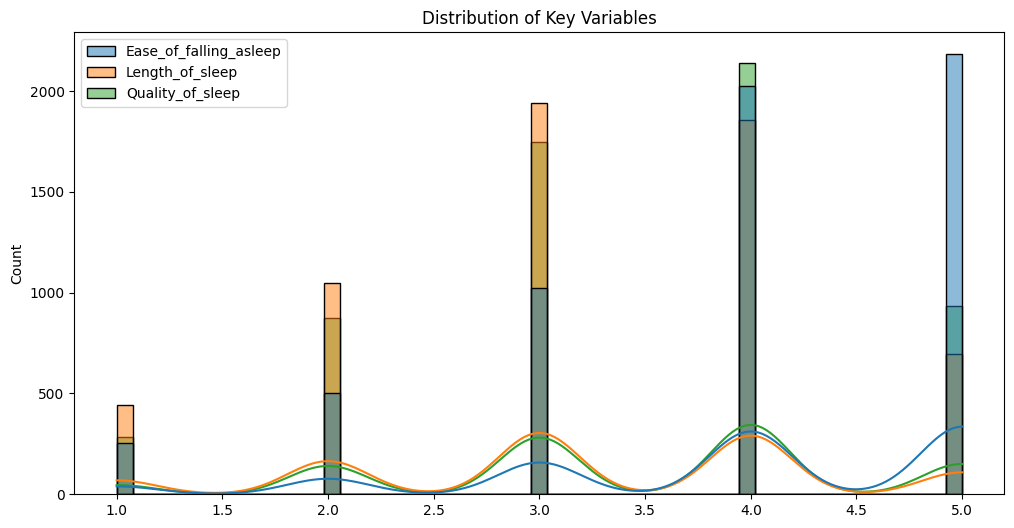

In [10]:
plt.figure(figsize=(12, 6))
key_variables = ['Time_fell_asleep', 'Time_woke_up', 'Time_got_up', 'Ease_of_falling_asleep', 'Length_of_sleep', 'Quality_of_sleep']
sns.histplot(dispatcher_data[key_variables], kde=True) # input one/many of what we consider key variables !!
plt.title('Distribution of Key Variables')
plt.show()

The histogram is not very useful with our dataset considering that not all of our key variables are integers or floats. In contrast, this correlation matrix helps us to visualize the already present trends for each of the key variables. In the future analysis, we might consider doing this with the work variables as well to see if there are any noticeable trends.

In [ ]:
# Exploring/Visualing the relationship between variables
plt.figure(figsize=(12,8))
sns.heatmap(dispatcher_data[key_variables].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In summary, the characteristics of the observed data prompted a reassessment of our analytical approach and how we should clean our data. Because of this, we thoroughly cleaned the dataset, ensuring its readiness for subsequent modeling endeavors. Among the potential models under consideration are Hidden Markov Models, Random Forest Models, and Linear Models. Each of these models is contingent upon specific assumptions, such as the assumption that the future state depends only on the current state and not on the sequence of events that preceded it, that features are relatively homogeneous in their predictive power across the dataset, or a linear relationship between the independent variables and the dependent variable, respectively. Moving forward, our analysis will delve deeper into these model options to ascertain which one aligns most effectively with our dataset.

## MODELING SECTION ! 

First, we are coding up the basic kalman filter algorithm as helper functions

In [8]:
# HELPER FUNCTIONS 
def kalman(F, Q, H, time_series):
    # Get dimensions
    dim_states = F.shape[0]

    # Initialize variables
    # covs[i] = P_{i | i-1}
    covs = np.zeros((len(time_series), dim_states, dim_states))
    mus = np.zeros((len(time_series), dim_states))

    # Solve of for first mu and cov
    covs[0] = np.linalg.solve(np.eye(dim_states**2) - np.kron(F,F), 
            np.eye(dim_states**2) @ Q.flatten()).reshape((dim_states,dim_states))
    mus[0] = np.zeros((dim_states,))

    # Update Kalman Filter
    for i in range(1, len(time_series)):
        # Assume u, R = 0
        SkInv = np.linalg.solve(H @ covs[i-1] @ H.T, np.eye(H.shape[0]))
        Kk_H_Pkk = covs[i-1] @ (H.T @ (SkInv @ (H @ covs[i-1])))
        covs[i] = F @ ((covs[i-1] - Kk_H_Pkk) @ F.T) + Q
        mus[i] = F @ mus[i-1] + (F @ (covs[i-1] @ (H.T @ SkInv))) @ (time_series[i-1] - H @ mus[i-1])
    return mus, covs

def state_space_rep(phis, thetas, mu, sigma):
    # Initialize variables
    dim_states = max(len(phis), len(thetas)+1)
    dim_time_series = 1 #hardcoded for 1d time_series

    F = np.zeros((dim_states,dim_states))
    Q = np.zeros((dim_states, dim_states))
    H = np.zeros((dim_time_series, dim_states))

    # Create F
    F[0,:len(phis)] = phis
    F[1:,:-1] = np.eye(dim_states - 1)
    # Create Q
    Q[0][0] = sigma**2
    # Create H
    H[0][0] = 1.
    H[0][1:len(thetas)+1] = thetas

    return F, Q, H, dim_states, dim_time_series

In [45]:
def arma_forecast_naive(data=dispatcher_data,p=2,q=1,n=2000):
    """
    Perform ARMA(p,q) on data. Let error terms be drawn from
    a standard normal, let c be 0, the phis be 0.5, and the 
    thetas be 0.1. Predict the next n observations and plot 
    the original data with the predictions.

    Parameters:
        file (str): data file
        p (int): order of autoregressive model
        q (int): order of moving average model
        n (int): number of future predictions
    """
    ## TODO need to figure out what data to predict and how to modify it 

    # take first difference to make data covariance stationary
    z = np.diff(data) 

    # getting rid of the missing data
    z = z[~np.isnan(z)]

    # parameters
    c = 0
    phi = 0.5
    theta = 0.1

    # initialize arrays for predictions
    predictions = np.zeros(n)

    # start predicting
    for i in range(n):
        # compute AR and MA terms
        ar_term = phi * z[-p:] if i >= p else phi * z[-i:]
        ma_term = theta * np.random.normal(size=q)  # random noise for MA term

        # make the prediction using the ARMA formula
        predictions[i] = c + np.sum(ar_term) + np.sum(ma_term)

        # append the prediction to z to use it for the next prediction
        z = np.append(z, predictions[i])

    # plot the observed differences and the predictions
    plt.plot(np.arange(len(z)), z, label='Observed Differences')
    plt.plot(np.arange(len(z) - n, len(z)), predictions, label='Predictions')
    plt.xlabel('Time')
    plt.ylabel('Difference in Sleep') # TODO Difference in Sleep ?
    plt.title('ARMA Forecast')
    plt.legend()
    plt.show()

In [39]:
def sm_arma(data, p_max=3, q_max=3, n=30):
    """
    Build an ARMA model with statsmodel and
    predict future n values.

    Parameters:
        filename (str): data filename
        p_max (int): maximum order of autoregressive model
        q_max (int): maximum order of moving average model
        n (int): number of values to predict

    Return:
        aic (float): aic of optimal model
    """
    # take first difference to make data covariance stationary
    z = np.diff(data)

    # getting rid of the missing data
    z = z[~np.isnan(z)]

    # I=initialize variables to store the best AIC and the corresponding p and q
    best_aic = float('inf')
    best_p = best_q = None

    # iterate over all possible combinations of p and q
    for p in range(1, p_max + 1):
        for q in range(1, q_max + 1):
            try:
                # fit ARIMA model
                model = ARIMA(z, order=(p, 0, q)).fit(method='innovations_mle')
                # calculate AIC
                aic = model.aic
                # check if current model has lower AIC than the best one so far
                if aic < best_aic:
                    best_aic = aic
                    best_p = p
                    best_q = q
            except:
                # if model fitting fails, continue to the next iteration
                continue
    # refit the best model
    best_model = ARIMA(z, order=(best_p, 0, best_q)).fit(method='innovations_mle')

    # predict future observations
    predictions = best_model.predict(start=0, end=len(z) + n - 1)

    # plot original observations and predictions
    plt.plot(np.arange(len(z)), z, label='Original Observations')
    plt.plot(np.arange(len(z) + n), predictions, label='Predictions')
    plt.xlabel('Time')
    plt.ylabel('Difference in Temperature')
    plt.title('ARMA Forecast with statsmodels')
    plt.legend()
    plt.show()

    return best_aic

In [13]:
## TODO modify data here

# Convert 'Time_fell_asleep' and 'Time_woke_up' columns to datetime objects
dispatcher_data['Time_fell_asleep'] = pd.to_datetime(dispatcher_data['Time_fell_asleep'])
print(dispatcher_data['Time_fell_asleep'])
print(dispatcher_data['Time_woke_up'])
dispatcher_data['Time_woke_up'] = pd.to_datetime(dispatcher_data['Time_woke_up'])

# Calculate the duration of sleep in hours
dispatcher_data['Hours_slept'] = (dispatcher_data['Time_woke_up'] - dispatcher_data['Time_fell_asleep']).dt.total_seconds() / 3600

# Display the DataFrame with the new column
print(dispatcher_data["Hours_slept"])

0      2006-04-26 02:30:00
1      2006-04-27 02:30:00
2      2006-04-28 02:30:00
3      2006-04-29 03:30:00
4      2006-04-30 03:30:00
               ...        
6197   2006-05-03 21:30:00
6198   2006-05-04 22:05:00
6199   2006-05-05 21:20:00
6200   2006-05-06 21:35:00
6201   2006-05-07 22:45:00
Name: Time_fell_asleep, Length: 6202, dtype: datetime64[ns]
0      2006-04-26 07:50:00
1      2006-04-27 10:50:00
2      2006-04-28 09:30:00
3      2006-04-29 08:30:00
4      2006-04-30 09:00:00
               ...        
6197   2006-05-04 04:20:00
6198   2006-05-05 04:30:00
6199   2006-05-06 04:50:00
6200   2006-05-07 06:45:00
6201   2006-05-08 06:20:00
Name: Time_woke_up, Length: 6202, dtype: datetime64[ns]
0       5.333333
1       8.333333
2       7.000000
3       5.000000
4       5.500000
          ...   
6197    6.833333
6198    6.416667
6199    7.500000
6200    9.166667
6201    7.583333
Name: Hours_slept, Length: 6202, dtype: float64


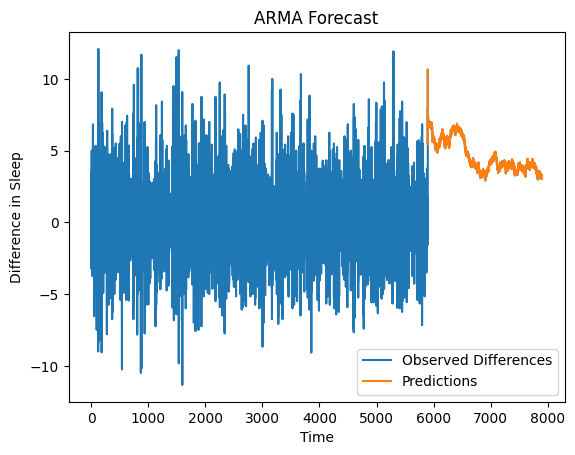

In [46]:
## TODO need to change data to be numerical, double check with weather.npy
arma_forecast_naive(dispatcher_data["Hours_slept"])